트랜스포머(Transformer) 모델은 RNN를 사용하지 않고, 인코더-디코더 구조만으로 설계되었음에도, 우수한 성능을 보여줌

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 1. 기존의 seq2seq 모델의 한계

------
seq2seq 모델은 인코더-디코더 구조로 구성되어 있으며, 이중 인코더는 **입력시퀀스를 하나의 벡터 표현으로 압축하고, 디코더는 이 벡터표현으로 출력 시퀀스를 만들어냄**

하지만 이러한 구조는 인코더가 입력시퀀스를 하나의 벡터로 압축하는 과정에서 **입력시퀀스의 정보가 일부 손실된다**는 단점이 있었음. 이를 보정하기 위해 어텐션이 사용됨

그러나 어텐션을 RNN의 보정을 위한 용도로서 사용하는 것이 아니라, 어텐션만으로 인코더와 디코더를 만들어보면 어떨까? 이것이 트랜스포머....

### 2. 트랜스포머(Transformer)의 주요 하이퍼파라미터
------------------
먼저, 트랜스포머에 필요한 하이퍼파라미터 정의.

* **$d_{model}$ = 512** : 인코더와 디코더의 정해진 입력과 출력의 크기를 의미. 임베딩 벡터의 차원 또한 $d_{model}$이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때에도 이 차원을 유지함
* **num_layers = 6** : 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미함
* **num_heads = 8** : 트랜스포머에서 어텐션을 사용할 때, 한번 하는 것보다 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식을 택함. 이 때 병렬의 개수를 의미함
* **$d_{ff}$** = 2048 : 트랜스포머 내부에는 피드 포워드 신경망이 존재하며 해당 신경망의 은닉층 크기를 의미함. 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$임


### 3. 트랜스포머(Transformer)
------
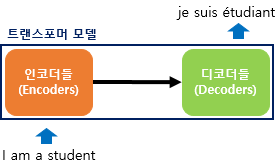



트랜스포머는 RNN을 사용하지 않지만, 기존의 seq2seq와 같이 인코더에서 입력 시퀀스를 입력받고 디코더에서 출력시퀀스를 출력하는 인코더-디코더 구조를 유지하고 있음. 

이전 seq2seq 구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되어 있는 구조임. 트랜스포머를 제안한 논문에서는 인코더와 디코더의 개수를 각각 6개 사용함

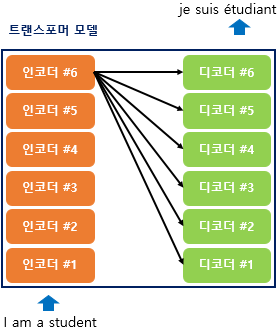

위의 그림은 인코더와 디코더가 6개씩 존재하는 트랜스포머 구조를 보여줌. 여기에서는 인코더와 디코더가 각각 여러 개 쌓여 있다는 의미를 사용할 때는 알파벳 s를 뒤에 붙여 encoders,decoders라고 표현함

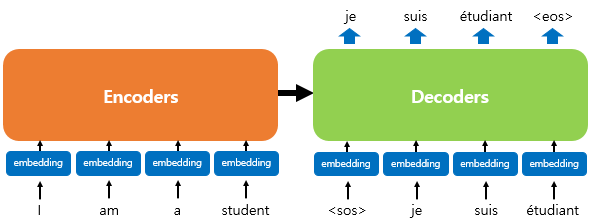

위의 그림은 인코더로부터 정보를 전달받아 디코더가 출력 결과를 만들어내는 트랜스포머 구조임. 디코더는 기존의 seq2seq 구조와 같이 시작 심볼 \<sos>를 입력으로 받아 종료 심볼 \<eos>가 나올 때까지 연산을 진행함. 이는 RNN을 사용하지 않지만, 여전히 인코더-디코더의 구조는 유지됨

우선, 트랜스포머 입력부터 구조를 살펴봄. 트랜스포머에서는 단순히 각 단어의 임베딩 벡터들을 입력받는 것이 아니라, 임베딩 벡터에서 조정된 값을 입력받는데 이에 대해 알아봄


### 4. 포지셔널 인코딩(Positional Encoding)
------------
RNN이 자연어처리에서 유용했던 이유는 단어의 위치에 따라 단어를 순차적으로 입력받아서 처리하는 RNN 특성으로 인해 각 단어의 위치정보(position information)를 가질 수 있다는 점임

하지만, 트랜스포머는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치정보를 다른 방식으로 알려줄 필요가 있음. 트랜스포머는 단어의 위치 정보를 얻기 위해 **각 단어의 임베딩 벡터에 위치 정보를 더하여 모델의 입력으로 사용**하는데, 이를 포지셔널 인코딩(positional encoding)이라고 함

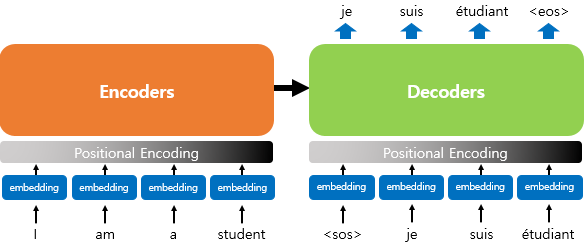

위의 그림은 입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기 전에 포지셔널 인코딩의 값이 더해지는 것을 보여줌. 임베딩 벡터가 인코더의 입력으로 사용되기 전 포지셔널 인코딩 값이 더해지는 과정을 시각화하면 아래와 같음

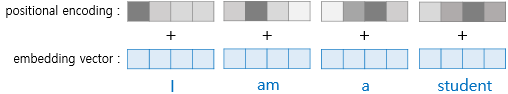

트랜스포머는 위치정보를 가진 값을 만들기 위해 아래의 두가지 함수를 사용함

$$PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})$$

$$PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})$$

트랜스포머는 사인함수와 코사인함수의 값을 임베딩 벡터에 더함으로써 단어의 순서 정보를 더하여 줌. 두 함수의 변수 $pos, i, d_{model}$를 사용하고 있음

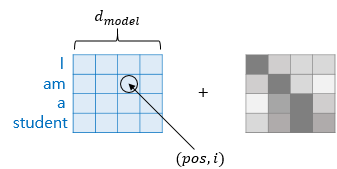


$pos$는 입력문장에서의 임베딩 벡터의 위치를 나타내며, $i$는 임베딩 벡터 내의 차원의 인덱스를 의미함. 위의 식에 따르면, 임베딩 벡터 내 **각 차원의 인덱스가 짝수인 경우에는 사인함수의 값을 사용하고 홀수인 경우에는 코사인 함수의 값을 사용**함

또한, 위의 식에서 $d_{model}$은 트랜스포머의 모든 층의 **출력차원을 의미**하는 트랜스포머의 하이퍼 파라미터임. 임베딩 벡터 또한 $d_{model}$ 차원을 가지며, 위의 그림에서는 4로 표현되어 있으나 실제 논문에서는 512의 값을 가짐

위의 값은 포지셔널 인코딩 방법을 사용하면 순서 정보가 보존되는데, 예를 들어 각 임베딩 벡터에 포지셔널 인코딩 값을 더하면 같은 단어라고 하더라도 문장 내의 위치에 따라 트랜스포머의 입력으로 들어가는 임베딩 벡터값이 달라짐.

In [2]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.position = position
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model): # i는 위치
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angles_rads = self.get_angles(position=tf.range(position, dtype=tf.float32)[:, tf.newaxis], 
                                      i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :], 
                                      d_model=d_model)
        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angles_rads[:, 0::2])  # 짝수만 적용
        cosines = tf.math.cos(angles_rads[:, 1::2]) # 홀수만 적용
        
        print("angle rads shape: ", angles_rads.shape)
        angles_rads = np.zeros(angles_rads.shape)
        angles_rads[:, 0::2] = sines
        angles_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angles_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        
        print("positional encoding shape: ", pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

50 x 128 크기를 가지는 포지셔널 인코딩 행렬을 시각화하여 어떤 형태를 가지는지 확인!!. 
입력문장의 단어가 50개 이면서 각 단어가 128개 차원으로 임베딩된 상태임

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 문장 길이 50, 임베딩 차원 128
sample_pos_encoding = PositionalEncoding(50, 128) 

angle rads shape:  (50, 128)
positional encoding shape:  (1, 50, 128)


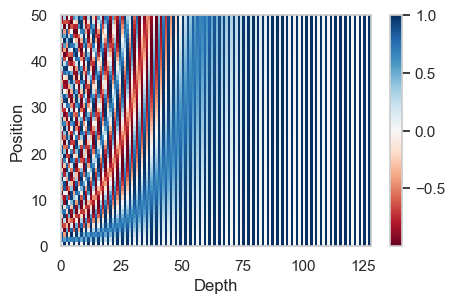

In [5]:
plt.figure(figsize=(5, 3))
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [6]:
sample_pos_encoding.pos_encoding.numpy()[0].shape

(50, 128)

### 5. 어텐션(Attention)
---------------------
트랜스포머에서 사용되는 어텐션은 세가지가 있음

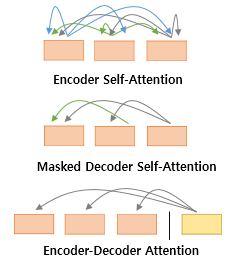


* Encoder Self-Attention : 셀프 어텐션이 인코더에서 이루어짐
* Masked Decoder Self-Attention : 셀프 어텐션이 디코더에서 이루어짐
* Encoder-Decoder Attention : 셀프 어텐션이 디코더에서 이루어짐

셀프 어텐션은 Query=Key=Value가 동일한 경우를 말함. 반면, 세번째의 경우 인코더-디코더 어텐션에서는 Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터이므로 셀프 어텐션이라고 부르지 않음

* 주의할 점은 Query, Key 등이 같다는 것은 **벡터의 값이 같다는 것이 아니라 벡터의 출처가 같다**는 의미임

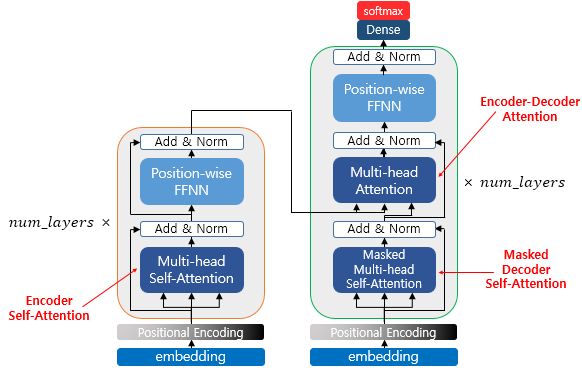

위의 그림은 트랜스포머의 아키텍처에서 세가지 어텐션이 각각 어디에서 이루어지는지 보여줌. 세개의 어텐션에 '멀티 헤드'라는 이름이 붙어 있음. 이와 같이 트랜스포머에서는 어텐션을 병렬적으로 수행됨.

### 6. 인코더(Encoder)
----------------------
인코더의 구조......

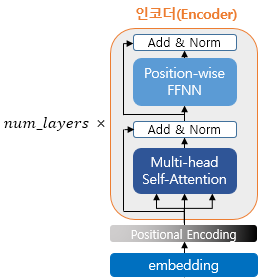

트랜스포머는 하이퍼 파라미터인 num_layers 개 인코더 층을 쌓게 됨. 논문에서는 6개 인코더 층을 사용함. 

하나의 인코더 층은 다시 2개의 서브층으로 나누어짐 ==> 셀프 어텐션, 피드포워드 신경망.

위의 그림에서는 Multi-head Self-Attention과 'Position-wise FFNN임. Multi-head Self-Attention은 셀프 어텐션을 병렬적으로 사용하였다는 의미고, Position-wise FFNN은 일반적인 피드포워드 신경망임

### 7. 인코더의 셀프 어텐션
--------------------
트랜스포머에서 셀프 어텐션을 사용하는데 기존과는 다소 다름

#### 7-1. 셀프 어텐션의 의미와 이점

어텐션 함수는 주어진 '쿼리(Query)'에 대해 모든 '키(Key)'와의 유사도를 각각 구함. 이렇게 구한 유사도를 가중치로 하여 키와 맵핑되어 있는 각각의 '값(Value)'에 반영함. 그리고 유사도가 반영된 이 값(values)을 모두 가중합하여 리턴함

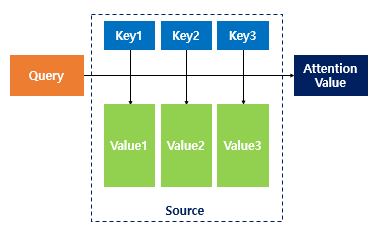

여기까지는 기존 개념과 동일함. 그런데 어텐션 중에서는 셀프 어텐션(self-attention)이라는 개념이 있으며, 이는 어텐션을 자기 자신에게 수행한다는 의미임. seq2seq에서의 어텐션에서는 Q, K, V는 다음과 같이 정의됨

기존에는 디코더 셀의 은닉상태가 Q이고, 인코더 셀의 은닉상태가 K라는 점에서 Q와 K가 서로 다른 값을 가지고 있음. 그런데 셀프 어텐션에서는 Q, K, V가 전부 동일함. 트랜스포머의 셀프 어텐션에서의 Q, K, V는 아래와 같음

셀프 어텐션은 입력문장 내의 단어들끼리 유사도를 구함으로써, 서로 연관되었을 확률을 알 수 있음. 트랜스포머에서의 셀프 어텐션의 동작 메커니즘을 알아봄

#### 7-2. Q, K, V 벡터 얻기

셀프 어텐션은 입력문장의 단어 벡터들을 가지고 수행하는데, 실제 셀프 어텐션은 인코더의 초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들을 사용하여 셀프 어텐션을 수행하는 것이 아니라, **우선 각 단어 벡터들로부터 Q벡터, K벡터, V벡터를 얻는 작업을 거침**

이때, 이 Q벡터, K벡터, V벡터들은 **초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들보다 더 작은 차원을 가짐.**, 논문에서는 $d_{model}$=512의 차원을 가졌던 각 단어벡터들을 64 차원을 가지는 Q벡터, K벡터, V벡터로 변환함

64라는 값은 트랜스포머의 하이퍼 파라미터인 **num_heads**로 인해 결정되는데, 트랜스포머는 $d_{model}$을 num_heads로 나눈 값을 각  Q벡터, K벡터, V벡터의 차원으로 결정함.

논문에서는 num_heads=8로 함(512 / 8 = 64).

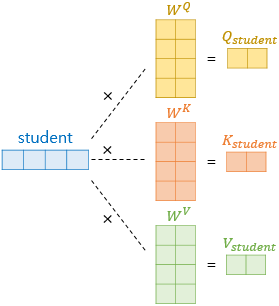


기존의 벡터로부터 더 작은 벡터는 가중치 행렬을 곱함으로써 완성됨. 

각 가중치 행렬은 $d_{model} × (d_{model}\text{/num_heads})$의 크기를 가짐. 이 가중치 행렬은 훈련과정에서 학습됨. 

즉, 논문과 같이 $d_{model}$=512이고 **num_heads**=8라면, 각 벡터에 3개의 서로 다른 가중치 행렬을 곱하고 64의 크기를 가지는 Q, K, V 벡터를 얻어냄. 위의 그림은 단어 벡터 중 student 벡터로부터 Q, K, V 벡터를 얻어내는 모습을 보여줌. 모든 단어 벡터에 위와 같은 과정을 거치면 I, am, a, student는 각각의 Q, K, V 벡터를 얻음

#### 7-3. 스케일드 닷-프로덕트 어텐션(scaled dot-product Attention)

Q, V, C 벡터를 얻으면 기존 어텐션 메커니즘과 동일함. 각 Q벡터는 모든 K 벡터에 대해 어텐션 스코어를 구하고, 어텐션 분포를 구한 뒤에 이를 사용하여 모든 V벡터를 가중합하여 어텐션 값 또는 컨텍스트 벡터를 구함. 그리고 이 과정을 Q벡터에서도 반복함

트랜스포머에서는 어텐션 함수 중 내적만 사용하는 어텐션 함수 $score(q, k)=q⋅k$가 아니라, 여기에 특정값으로 나누는 어텐션 함수인 $score(q, k)=q⋅k/\sqrt{n}$를 사용함. 이 함수를 scaled dot-product Attention임

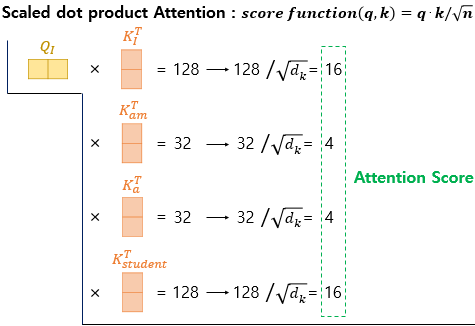

우선, 단어 I에 대한 Q벡터($Q_I$)를 기준으로 am에 대한 Q벡터, a에 대한 Q벡터, student에 대한 Q벡터에 대해서도 모두 동일한 과정을 거침

위의 그림은 **단어 I에 대한 Q벡터가 모든 K벡터에 대해 어텐션 스코어를 구하는 것**을 보여줌. 위의 128과 32는 임의로 가정한 수치임

위의 그림에서 어텐션 스코어는 단어 I가 단어 I, am, a, student와 얼마나 연관되어 있는지 보여주는 수치임. 트랜스포머에서는 두 벡터의 내적값을 스케일링하는 값으로 K 벡터의 차원을 나타내는 $d_k$에 루트를 씌운 $\sqrt{d_{k}}$를 사용함. 논문에서는 $d_{k}$는 $d_{model}\text{/num_heads}$라는 식에 따라 64의 값을 가지므로 $\sqrt{d_{k}}$는 8의 값을 가짐

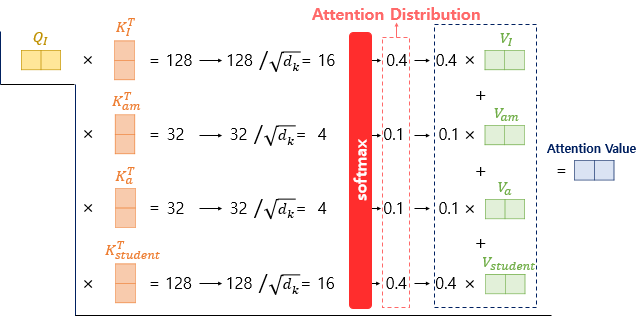

이렇게 해서 어텐션 분포(Attention Distribution)을 구하고, 각 V벡터와 가중합하여 어텐션 값(Attention Value)를 구함. 이를 단어 I에 대한 어텐션 값 또는 단어 I에 대한 컨텍스트 벡터라고도 할 수 있음

am에 대한 Q벡터, a에 대한 Q벡터, student에 대한 Q벡터에 대해서도 모두 동일한 과정을 반복하여 각각에 대한 어텐션 값을 구함.

#### 7-4. 행렬연산으로 일괄 계산

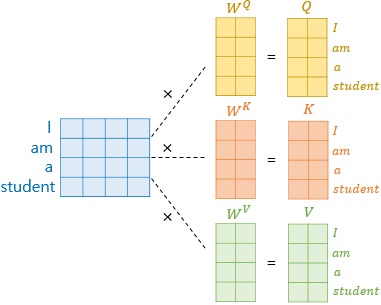

Q행렬을 K행렬을 전치한 행렬과 곱해주면, 각 단어의 Q벡터와 K벡터의 내적이 각 행렬의 원소가 되는 행렬이 결과로 나옴



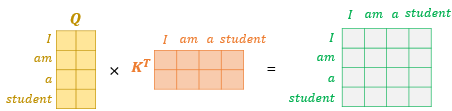

즉, 행렬 값에 전체적으로 $\sqrt{d_{k}}$를 나누어 주면 어텐션 스코어 값을 가지는 행렬이 됨. 다음으로 소프트맥스 함수를 통해 어텐션 분포를 구하고, V행렬을 곱하면 각 단어의 어텐션 값을 가지는 행렬이 됨


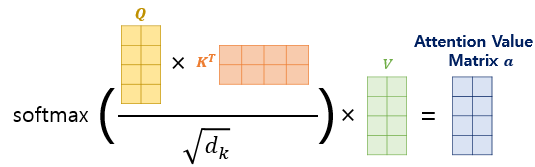

실제 트랜스포머 수식은 아래와 같음

$$Attention(Q, K, V) = softmax({QK^T\over{\sqrt{d_k}}})V$$


이상 정리하면, 행렬의 각 행에 해당하는 Q벡터와 K벡터의 차원을 $d_k$라고 하고, V벡터의 차원을 $d_v$라고 하면, Q행렬과 K행렬의 크기는 (seq_len, $d_k$)이며, V행렬의 크기는 (seq_len, $d_v$)가 되어야 함. 그리고, 문장행렬과 Q,K,V 행렬의 크기로부터 가중치 행렬의 크기 추정이 가능함. $W^Q$와 $W^K$는 ($d_{model}$, $d_k$)의 크기를 가지며 $W^V$는 ($d_{model}$, $d_v$)의 크기를 가짐

논문에서는 $d_{model}\text{/num_heads}= d_{k}=d_{v}$를 적용함

최종적으로 $softmax({QK^T\over{\sqrt{d_k}}})V$식을 적용하여 나오는 어텐션 값 행렬 $a$의 크기는 ($d_{model}$, $d_v$)이 됨


#### 7-5. Scaled Dot-Product Attention 코드

In [7]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query 문장길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key 문장길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value 문장길이, d_model/num_heads)
    # padding mask : (batch_size, 1, 1, key의 문장길이)
    
    # Q와 K의 곱. 어텐션 스코어의 행렬
    matmul_qk = tf.matmul(query, key, transpose_b=True) # key를 전치한 후 곱함
    
    # 스케일링 : dk의 루트값으로 나눔
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # 마스킹. 어텐션 스코어 행렬의 마스킹 위치에 매우 작은 음수값을 넣는다.
    # 아주 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 됨
    if mask is not None:
        logits += (mask * -1e9)
        
    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행됨
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    # output : (batch_size, num_heads, query 문장길이, d_mode/num_heads)
    output = tf.matmul(attention_weights, value)
    
    return output, attention_weights

테스트 !!

In [8]:
# 임의의 Query, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress=True) # 소수점 이하 길이 줄여줌. 설정하면 이하의 작업들 모두에 적용.
temp_k = tf.constant([[10, 0, 0], [0, 10, 0], [0, 0, 10], [0, 0, 10]], dtype=tf.float32)  # (4,3)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
temp_v = tf.constant([[1, 0], [10, 0], [100, 5], [1000, 6]], dtype=tf.float32) # (4, 2)

In [9]:
temp_k.shape, temp_v.shape, temp_q.shape

(TensorShape([4, 3]), TensorShape([4, 2]), TensorShape([1, 3]))

주목할 점은 Query 값 [0, 10, 0]이 Key의 두번재 값과 동일함. 이럴 경우 어텐션 분포와 어텐션 값은 다음과 같음

In [10]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포
print(temp_out)  # 어텐션 값

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


어텐션 분포 중 두번째 값이 1이 나오는 결과가 되며, value의 두번째 값인 [10, 0]이 출력되는 것을 확인할 수 있음. 이번에는 query 값만 다른 값으로 바꿔보고 실행하면 다음과 같음

In [11]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn)
print(temp_out)

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


Key 행렬 중 세번째, 네번째와 동일하기 때문에, 어텐션 분포 값은 각각 0.5, 0.5로 나오고, 출력은 value의 세번째와 네번째 중간 값이 나옴

다음은 하나가 아닌 3개의 Query 값을 함수의 입력으로 사용함

In [12]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32) # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn)
print(temp_out)

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


#### 7-6. 멀티 헤드 어텐션(Multi-head Attention)

* num_heads의 의미?
* 왜 $d_{model}$의 차원을 가진 단어 벡터를 가지고 어텐션을 하지 않고 차원을 축소시킨 벡터로 어텐션을 수행하는지?
-----------------
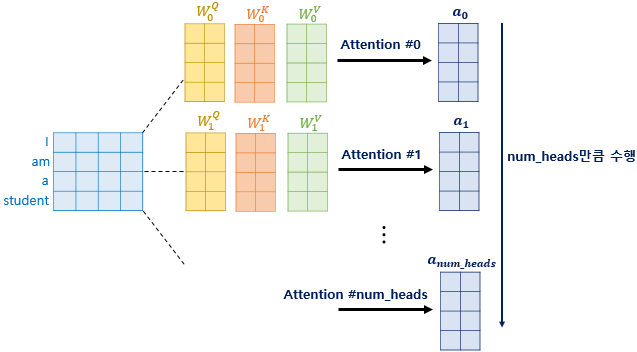

트랜스포머 연구팀은 여러번의 어텐션을 병렬로 사용하는 것이 더 효과적이라고 판단하여, $d_{model}$ 차원을 num_heads로 나눈 차원의 Q, K, V에 대해 num_heads번 병렬 어텐션을 수행함. 논문에서는 num_heads=8로 설정. 따라서 병렬로 8개가 어텐션이 수행되고, 각각의 어텐션 값(행렬)을 어텐션 헤드라고 부름. 이 때 가중치 행렬 $W^{Q}, W^{K}, W^{V}$의 값은 8개 어텐션마다 모두 다름

병렬 어텐션을 수행하면, 다른 시각으로 정보를 수집할 수 있다는 것임. 

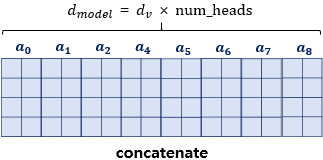

병렬 어텐션을 모두 수행하면 모든 어텐션 헤드를 연결해야 함. 연결된 헤드의 행렬 크기는 $(\text{seq_len},\ d_{model})$가 됨. 

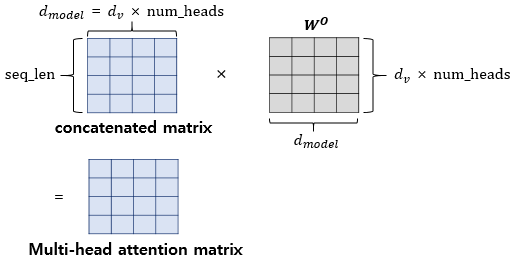

어텐션 헤드를 모두 연결한 행렬은 또 다른 가중치 행렬 $W^0$을 곱하게 되는데, 이것이 멀티-헤드 어텐션의 최종 결과물임(위의 그림). 결과물인 멀티-헤드 어텐션 행렬은 인코더의 입력이었던 문장행렬의 $(\text{seq_len},\ d_{model})$와 동일하게 됨

#### 7-7. 멀티 헤드 어텐션(Multi-head Attention) 구현
멀티 헤드 어텐션에서는 두종류의 가중치 행렬이 나옴. Q, K, V 행렬을 만들기 위한 가중치 행렬인 WQ, WK, WV 행렬과 이를 어텐션 헤드들을 연결(concatenation) 후 곱해 주는 WO 행렬임. 가중치 행렬을 곱하는 것을 코드에서는 전결합층, 즉 밀집층(Dense layer)를 지나게 하여 구현함

멀티 헤드 어텐션 구현은 다음의 5개로 구성됨

1. WQ, WK, WV에 해당하는 d_model의 크기의 밀집층(Dense layer)를 지나게 함
2. 지정된 헤드수(num_heads)만큼 나눔(split)
3. 스케일드 닷 프로덕트 어텐션
4. 나눈 헤드들을 다시 연결 ==> WO 곱하기
5. WO에 해당 밀집층을 지나게 함

In [13]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        # d_model을 num_heads로 나눈 값(d_k)
        self.depth = d_model // self.num_heads
        
        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
        # W0에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)
        
    # num_heads 만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]
        
        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q: (batch_size, query의 문장길이, d_model)
        # k: (batch_size, key의 문장길이, d_model)
        # v: (batch_size, value의 문장길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있음
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        # 3. scaled dot product attention (앞서 구현한 함수 이용)
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        
        # (batch_size, query 문장길이, num_heads, d_model/num_hedas)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # 4. 헤드 연결
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        
        # 5. W0에 해당하는 밀집층 지나기
        # (batch_size, query 문장 길이, d_model)
        outputs = self.dense(concat_attention)  # self.dense == WO
        
        return outputs

#### 7-8. 패딩 마스크(Padding Mask)

mask에는 아주 작은 음수값을 곱한 후 어텐션 스코어 행렬에 더해 줌. 이는 입력문장에 \<PAD> 토큰이 있을 경우, 어텐션에는 사실상 제외하기 위한 연산임. 예를 들어, \<PAD>가 포함된 입력문장의 셀프 어텐션 예제를 보면, 이에 대해 어텐션을 수행하고 어텐션 스코어 행렬을 얻는 과정은 다음과 같음

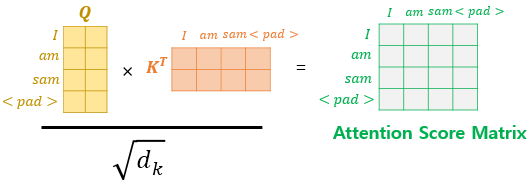

그러나 \<PAD>의 경우에는 실질적인 의미를 가진 단어가 아니기 때문에, 이에 대해 유사도(어텐션)를 구하지 않도록 마스킹 하는 것임. 

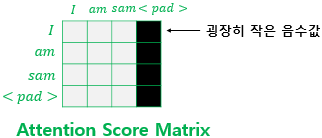

마스킹을 하는 방법은 어텐션 스코어 행렬 중 마스킹해야 하는 위치에 아주 작은 음수값을 넣는 것임. 현재 어텐션 스코어 함수는 소프트맥스 함수를 지나기 전인 상태로, 이 행렬이 소프트맥스 함수를 지난 후에는 해당 위치의 값은 0이 되어 단어 간 유사도를 구하는 일에 \<PAD> 토큰이 반영되지 않게 됨

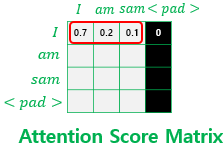

패딩 마스크를 구현하는 방법은 입력된 정수 시퀀스에서 패딩 토큰의 인덱스인지, 아닌지를 판별하는 함수를 구현하는 것임. 아래의 함수는 정수 시퀀스에서 0인 경우에는 1로 변환하고, 그렇지 않은 경우에는 0으로 변환하는 함수임

In [14]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)  # x=0이면 True이므로 1반환
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [15]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


벡터 [1, 21, 777, 0, 0] 중에서 0의 값을 가진 위치에 대해 마스킹됨. ==> [0, 0, 0, 1, 1]

### 8. 포지션-와이즈 피드 포워드 신경망(Position-wise FFNN)
-----------
포지션 와이즈 FFNN은 인코더와 디코더에서 공통적으로 가지고 있는 서브층임. 포지션 와이즈 FFNN는 완전 연결 FFNN(Fully-connected FFNN)이라고 해석할 수 있음.

$$FFNN(x) = MAX(0, x{W_{1}} + b_{1}){W_2} + b_2$$

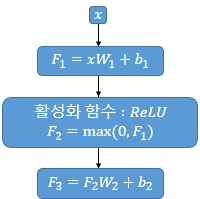

여기서 $x$는 앞서 멀티 헤드 어텐션의 결과로 나온 $(\text{seq_len},\ d_{model})$의 크기를 가지는 행렬을 말함. 가중치 행렬 $W_1$은 $(d_{model},\ d_{ff})$의 크기를 가지고, 가중치 행렬 $W_2$은 $(d_{ff},\ d_{model})$의 크기를 가짐

논문에서 은닉층의 크기 $d_{ff}$는 2,048의 크기를 가짐. 여기서 매개변수 $W_{1}, b_{1}, W_{2}, b_{2}$는 하나의 인코더 층 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하게 사용됨. 하지만 인코더 층마다는 다른 값을 가짐

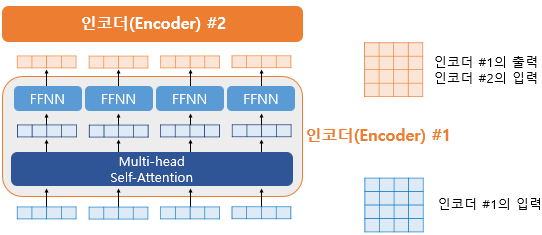

위의 그림에서 좌측은 인코더의 입력을 벡터 단위로 봤을때, 각 벡터들이 멀티헤드 어텐션 층이라는 인코더 내 첫번째 서브층을 지나 FFNN을 통과하는 것을 보여줌. 

실제, 우측의 행렬과 같이 계산되는데 두번째 서브층을 지난 인코더의 최종 출력은 여전히 인코더의 입력크기였던 $(\text{seq_len},\ d_{model})$의 크기가 보존되고 있음. 

하나의 인코더층을 지난 이 행렬은 다음 인코더 층으로 전달되고, 다음 층에서도 동일한 인코더 연산이 반복됨

### 9. 잔차 연결(Residual connection)과 층 정규화(Layer Normalization)
------------
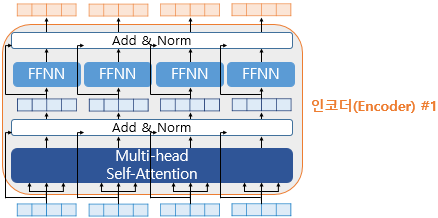

트랜스포머에서 이러한 두개의 서브층을 가진 인코더에 추가적으로 사용하는 방법이 Add & Norm임. 정확히는 잔차연결(residual connection)과 층 정규화(layer normalization)를 의미함

#### 9-1. 잔차연결(Residual connection)

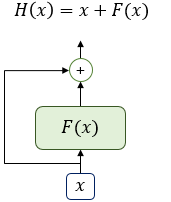

입력 $x$와 $x$에 대한 함수 $F(x)$의 값을 더한 함수 $H(x)$의 구조를 보여줌. 함수 $F(x)$가 트랜스포머에서는 서브층에 해당함. 즉, 잔차연결은 서브층의 입력과 출력을 더하는 것을 말함. 

트랜스포머에서 서브층의 입력과 출력은 동일한 차원을 갖고 있으므로, 서브층의 입력과 서브층의 출력은 덧셈 연산을 할 수 있음. 이것이 위의 인코더 그림에서 각 화살표가 서브층의 입력에서 출력으로 향하도록 그려진 이유임. 잔차 연결은 컴퓨터 비전 분야에서 주로 사용되는 모델 학습방법임

$$x+Sublayer(x)$$

가령, 서브층이 멀티 헤드 어텐션이었다면 잔차 연결연산은 다음과 같음

$$H(x) = x+Multi-head\ Attention(x)$$

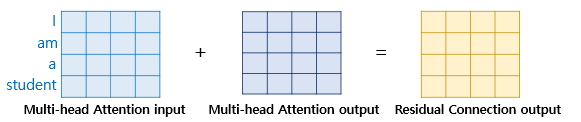

위 그림은 멀티 헤드 어텐션 입력과 멀티헤드 어텐션 결과가 더해지는 과정임

#### 9-2. 층 정규화(Layer Normalization)

잔차 연결을 거친 결과는 이어서 층 정규화 과정을 거치게 됨. 잔차 연결의 입력을 $x$, 잔차연결과 층 정규화 두가지 연산을 모두 수행한 후의 결과 행렬을 $LN$이라고 할 때, 잔차 연결 후 층 정규화 연산을 수식을 표현하자면 다음과 같음

$$LN = LayerNorm(x+Sublayer(x))$$

층 정규화는 텐서의 마지막 차원에 대해 평균과 분산을 구하고, 이를 가지고 정규화하여 학습을 돕게 됨. 텐서의 마지막 차원이란 $d_{model}$ 차원을 의미함. 


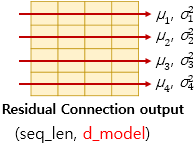

층 정규화를 위해 우선, 화살표 방향으로 각각 평균 $μ$와 분산 $σ^{2}$를 구함. 각 화살표 방향의 벡터를 $x_i$라고 하면, 

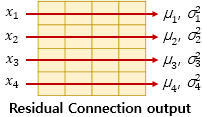

층 정규화를 수행한 후에는 벡터 $x_i$는 $ln_{i}$라는 벡터로 다시 정규화가 됨

$$ln_{i} = LayerNorm(x_{i})$$

층 정규화 수식.... 층 정규화의 과정은 두가지로 나누어서 설명됨. 

1. 평균과 분산을 통한 정규화
2. 감마와 베타를 도입한 정규화

우선, 평균과 분산의 정규화는 다음과 같이 정규화 가능

$$\hat{x}_{i, k} = \frac{x_{i, k}-μ_{i}}{\sqrt{σ^{2}_{i}+\epsilon}}$$

$\epsilon$은 분모가 0이 되는 것을 방지함

두번째로, $\gamma$와 $\beta$라는 벡터를 준비하고 초기값을 각각 1, 0으로 설정함
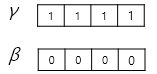

최종 수식은 다음과 같으며, $\gamma$와 $\beta$는 학습가능한 파라미터임

$$ln_{i} = γ\hat{x}_{i}+β = LayerNorm(x_{i})$$

케라스에서는 층정규화를 위한 LayerNormalization()를 제공하고 있음

### 10. 인코더 구현하기

---------
지금까지의 내용을 인코더를 구현하면 다음과 같음. 인코더의 입력으로 들어가는 문장에는 패딩이 있을 수 있기 때문에, 어텐션 시 패딩 토큰을 제외할 수 있도록 패딩 마스크를 사용함. 이는 MultiHeadAttention 함수의 mask 인자값으로 padding_mask가 사용되는 이유임

인코더는 멀티헤드 어텐션과 피드 포워드 신경망의 2개 서브층으로 구성됨. 각 서브층 이후에는 드롭아웃 --> 잔차연결--> 층 정규화가 수행됨

In [16]:
def encoder_layer(dff, d_model, num_heads, dropout, name='encoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name='attention')({
        'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
        'mask': padding_mask,
    })
    
    # dropout ==> 잔차연결, 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)
    
    # 포지션 와이드 FNN(두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    # 드롭아웃 ==> 잔차연결, 층정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs) # 여기서는 attention을 더함
    
    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

위의 코드는 하나의 인코더 블록을 구현하는 코드이기 때문에, 실제 트랜스포머의 num_layers 개수만큼의 인코더 층을 사용하는 코드가 필요함

### 11. 인코더 쌓기
-------------------------------

여기서는 num_layers개 만큼 인코더 층을 쌓아 마지막 인코딩 층에서 얻는 (seq_len, d_model) 크기의 행렬을 디코더로 보내주는 코드를 구현함

In [17]:
def encoder(vocab_size, num_layers, dff, d_model, num_heads, dropout, name='encoder'):
    inputs = tf.keras.Input(shape=(None, ), name="inputs")
    
    # 인코더는 패딩 마스크를 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads, dropout=dropout, 
                                name='encoder_layer_{}'.format(i))([outputs, padding_mask])
    print(outputs)
        
    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

### 12. 인코더에서 디코더로 (From Encoder To Decoder)
----------------------
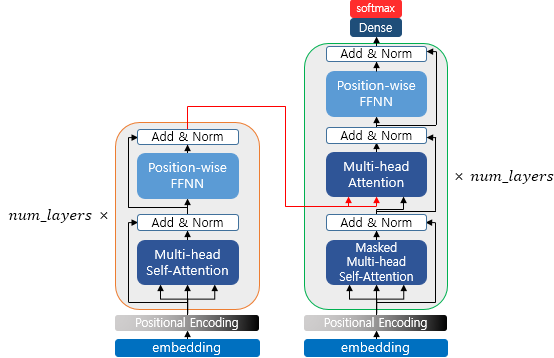

구현된 인코더는 마지막 층의 인코더 출력을 디코더에게 전달하게 됨

### 13. 디코더의 첫번째 서브층 : 셀프 어텐션과 룩-어헤드 마스크
----------------
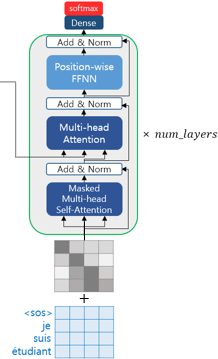

디코더도 인코더와 동일하게 임베딩 층과 포지셔널 인코딩을 거친 후의 문장 행렬이 입력됨. 트랜스포머 또한 seq2seq와 마찬가지로 교사강요(Teacher Forcing)을 사용하여 훈련되므로 학습과정에서 디코더는 번역할 문장에 해당하는 문장행렬을 한번에 입력받음. 그리고 디코더는 이 문장행렬로부터 각 시점의 단어를 예측하도록 훈련됨

여기서 문제는 seq2seq의 디코더에 사용되는 RNN 계열의 신경망은 입력단어를 매시점마다 순차적으로 입력받으므로 다음 단어 예측에 현재 시점을 포함한 이전 시점에 입력된 단어들만 참고할 수 있음

반면, 트랜스포머는 문장행렬로 입력을 한번에 받으므로 현재 시점의 단어를 예측하고자 할 때, 입력문장 행렬로부터 미래시점의 단어까지도 참고할 수 있게 됨. 예를 들어, suis를 예측해야 할 때, RNN 계열의 seq2seq의 디코더라면 현재까지 디코더에 입력된 단어는 \<sos>와 je뿐일 것임. 

반면, 트랜스포머는 이미 문장 행렬로 \<sos> je suis etudiant를 입력받음

이를 위해 트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 룩-어헤드 마스크(look-ahead mask)를 도입함. 

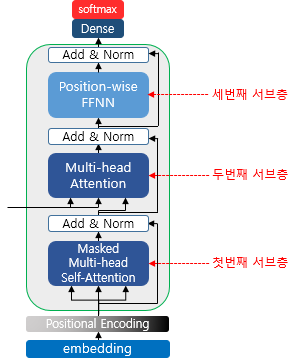

룩-어헤드 마스크(look-ahead mask)는 디코더의 첫번째 서브층에서 이루어짐. 디코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층은 인코더의 첫번째 서브층인 멀티헤드 셀프 어텐션 층과 동일한 연산을 수행하나, 다른 점은 어텐션 스코어 행렬에서 마스킹을 적용한다는 점이 다름

먼저, 다음과 같이 셀프 어텐션을 통해 어텐션 스코어행렬을 얻음

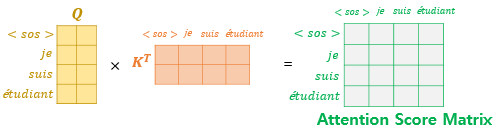

자기 자신보다 미래에 있는 단어들을 참고하지 못하도록 다음과 같이 마스킹함

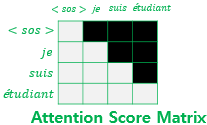

룩-어헤드 마스크의 구현은 패딩 마스크와 마찬가지로, 어텐션 함수에 mask라는 인자로 전달되며, 룩 어헤드 마스킹을 써야 하는 경우, 스케일드 닷 프로덕트 어텐션 함수에 룩-어헤드 마스크를 전달하면 됨

트랜스포머에는 총 세가지 어텐션이 존재하며, 모두 멀티 헤드 어텐션을 수행하고, 멀티 헤드 어텐션 함수 내부에서 스케일드 닷 프로덕트 어텐션 함수를 호출하는데 각 어텐션시 함수에 전달하는 마스킹은 다음과 같음

* 인코더의 셀프 어텐션 : 패딩 마스크를 전달

* 디코더의 첫번째 서브층인 마스크드 셀프 어텐션 : 룩-어헤드 마스크를 전달
* 디코더의 두번째 서브층인 인코더-디코더 어텐션 : 패딩 마스크 전달

룩-어헤드 마스크를 구현하는 방법은 패딩 마스크와 마찬가지로 마스킹을 하고자 하는 위치에 1을, 마스킹을 하지 않는 위치에는 0을 리턴함

In [18]:
# 디코더의 첫번째 서브층에서 미래 토른을 mask하는 함수
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0) # 상삼각행렬 구하기
    padding_mask = create_padding_mask(x) # 패딩 마스크도 추가
    #print(look_ahead_mask)
    #print(padding_mask)
    return tf.maximum(look_ahead_mask, padding_mask)

In [19]:
tf.linalg.band_part(tf.ones((5, 5)), -1, 0)  # 하삼각 행렬 구하기

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

테스트 !!

In [20]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]]))) # 세번째 위치에 정수 0을 넣음

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


세번째 위치에 패딩 마스크가 포함되어져 있는 세번째 열이 마스킹됨


### 14. 디코더의 두번째 서브층 : 인코더-디코더 어텐션
----------------------
디코더의 두번째 서브층은 멀티 헤드 어텐션을 수행한다는 점에서 이전의 어텐션들(인코더와 디코더의 첫번째 서브층)과 유사하나, 이번에는 셀프 어텐션이 아님

셀프 어텐션은 Query, Key, Value가 같은 경우를 말하는데, 인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key와 Value는 인코더 행렬이기 때문임.

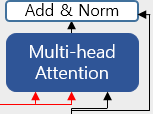

두개의 화살표는 각각 Key와 Value를 의미하며, 인코더의 마지막 층에서 온 행렬로부터 얻음. 반면 Query는 **디코더의 첫번째 서브층의 결과 행렬**로부터 얻는다는 점이 다름

Query가 디코더 행렬, key가 인코더 행렬일 때, 어텐션 스코어 행렬을 구하는 과정은 다음과 같음



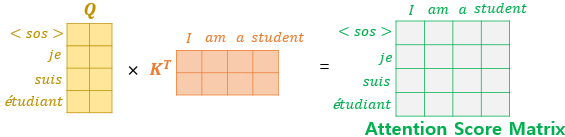


### 15. 디코더 구현
-------------------
총 세개의 서브층으로 구성
1. 멀티 헤드 어텐션 : look_ahead_mask
2. 멀티 헤드 어텐션 : padding_mask
3. 드롭아웃 ==> 잔차연결 ==> 층 정규화

In [21]:
def decoder_layer(dff, d_model, num_heads, dropout, name='decoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    
    # 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    
    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name='attention1')(inputs={
        'query': inputs, 'key': inputs, 'value': inputs,  # Q = K = V
        'mask': look_ahead_mask
    })
    
    # 잔차연결과 층 정규화(드롭아웃 생략)
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)
    
    # 멀티 헤드 어텐션(두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(d_model, num_heads, name='attention_2')(inputs={
        'query': attention1, 'key': enc_outputs, 'value': enc_outputs, 'mask': padding_mask
    })
    
    # 드롭아웃 + 잔차연결, 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)
    
    # 포지션 와이드 FNN(세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    # 드롭아웃 + 잔차연결, 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)
    
    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

디코더도 num_layers개 만큼 쌓는 코드가 필요함

### 16. 디코더 쌓기
-----------------
포지셔널 인코딩 후 디코더층을 num_layers 개수만큼 쌓음

In [22]:
def decoder(vocab_size, num_layers, dff, d_model, num_heads, dropout, name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='enc_outputs')
    
    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘다 사용
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    # 디코더를 num_layer개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads, dropout=dropout, 
                                name='decoder_layer_{}'.format(i))\
        (inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])
        
    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name
    )

### 17. 트랜스포머 구현
--------
인코더의 출력은 디코더에서 인코더-디코더 어텐션에서 사용되기 위해 디코더로 전달해줌. 그리고 디코더의 끝단에는 다중 클래스 분류 문제를 풀수 있도록 vocab_size만큼의 뉴런을 가지는 출력층을 추가함

In [23]:
def transformer(vocab_size, num_layers, dff, d_model, num_heads, dropout, name='transformer'):
    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    
    
    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name='dec_inputs')
    
    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name='enc_padding_mask')(inputs)
    
    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None), name='look_ahead_mask')(dec_inputs)
    
    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name='dec_padding_mask')(inputs) # 주의!!
    
    # 인코더의 출력은 enc_outputs 디코더로 전달
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff, 
                          num_heads=num_heads, d_model=d_model, dropout=dropout)\
                        (inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력문장과 패딩 마스크
    
    # 디코더의 출력은 dec_outputs, 출력층으로 전달
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff, 
                          d_model=d_model, num_heads=num_heads, dropout=dropout)\
                        (inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    
    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name='outputs')(dec_outputs)
    
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

### 18. 트랜스포머 하이퍼 파라미터 정하기
---------------------
단어 집합 크기(vocab_size)는 임의로 9,000개로 정함. 단어집합 크기로 룩업테이블을 수행할 임베딩 테이블과 포지셔널 인코딩 행렬의 행의 크기를 결정할 수 있음

In [24]:
# graphviz path 
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

angle rads shape:  (9000, 128)
positional encoding shape:  (1, 9000, 128)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the 

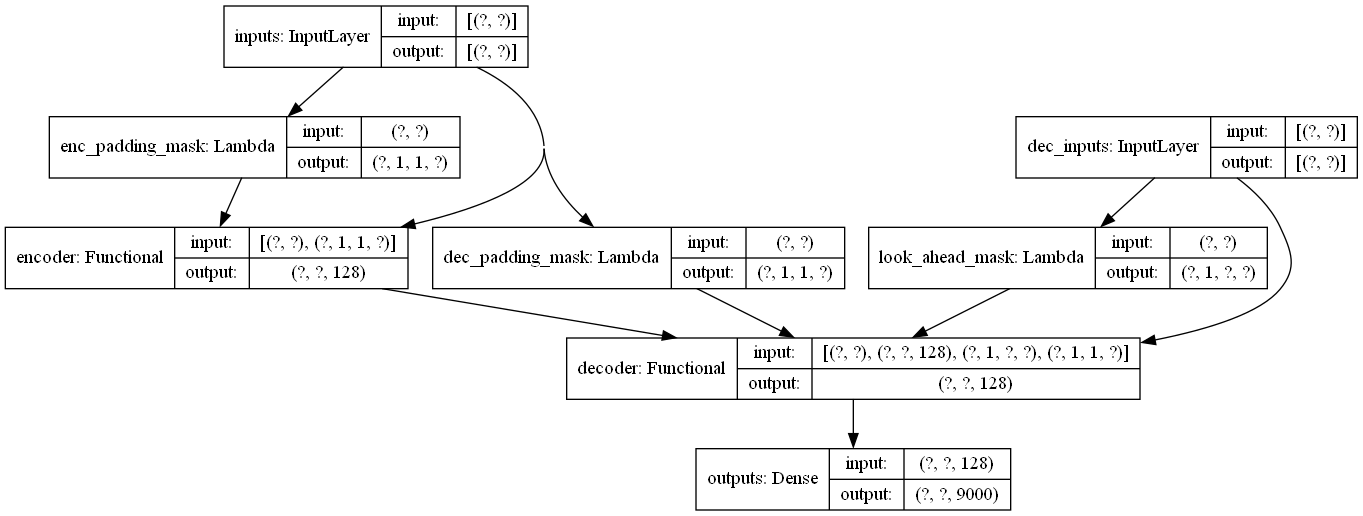

In [25]:
# 논문과 다르게 설정
small_transformer = transformer(
    vocab_size=9000, num_layers=4, dff=512, d_model=128, num_heads=4, 
    dropout=0.3, name='small_transformer')

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True
)

### 19. 손실함수 정의
--------------------
다중 클래스 문제를 풀 예정이므로 크로스 엔트로피 함수를 손실함수로 정의

In [26]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    
    return tf.reduce_mean(loss)

### 20. 학습률
----------------
학습률 스케줄러는 미리 학습 일정을 정해두고 그 일정에 따라 학습률이 조정되는 방법임. 트랜스포머의 경우 **사용자가 정한 단계까지 학습률을 증가시켰다가 단계에 이르면 학습률을 점차적으로 떨어트리는 방식**을 사용함

1 step_num(단계)는 옵티마이저가 매개변수 업데이트를 한번 진행한다는 작업을 의미하고, warmup_steps라는 변수를 정하여 step_num이 warmup_steps보다 작을 경우 학습률을 선형적으로 증가시키고, 도달할 경우에 step_num의 역제곱근에 따라 감소시킴

$$\Large{lrate = d_{model}^{-0.5} × min(\text{step_num}^{-0.5},\ \text{step_num} × \text{warmup_steps}^{-1.5})}$$

여기에서는 warmup_steps 값으로 4,000을 사용함

In [27]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

학습률 변화를 시각화함

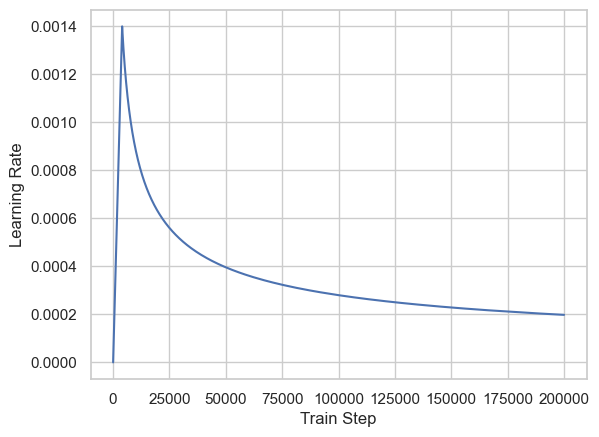

In [28]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
plt.show()